# SYD DAT 4 Project : Hospital Readmissions prediction

### Overview 

I had an opportunity to work as a software engineer at Vanderbilt University Medical Center,US where I was involved in biomedical research projects. It is very gratifying as a computer science person to help solve interesting and challenging health care problems, which is why I choose this project.

Hospital readmission means when a patient is re-admitted to a hospital within short period(usually 28/30 days)after first time or initial discharge. Such readmissions are major health care concern for most countries like US, UK, Australia and many others. This leads to increased wait times, increased medical errors resulting in risking patient safety and unncessary deaths. High readmission rate is infact an indicator of poor quality care of the hospital. It also puts huge monetary burden on the hospitals as well as the government. In this project, I want to identify patients who are likely to be readmitted to the hospital. By doing this, proper care and management of such patients can be planned by their care providers.

### Goal(s) : 
Predict if a patient will be readmitted to the hospital or not?

### Data set used : 

In order to achieve the above goal(s), I need a hospital data set that has records of all hospitalizations entries for its patients for certain number of years. It should contain information like why the patients were admitted, which department they were admitted for, how many times they were admitted, what medications they were on, what lab tests were conducted, how many days they stayed in hospital, vitals signs like heights/weights, age, race, blood pressure, smoking status, their electronic medical records, billing records, genetics data, etc.

Of course, it's hard to obtain such a heterogeneous dataset which is publicly available as patient data are very confidential. Though there are quite a few data sets that contain substantial information and after going through some of them, I decided to use "Diabetes 130-US hospitals for years 1999-2008 Data Set".

This is a public available database by Center for Clinical and Translational Research, Virginia Commonwealth University. This data is a de-identified abstract of the Health Facts database (Cerner Corporation, Kansas City, MO). It contains 10 years of diabetes patients data across 130 US hospitals.

http://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

### Summary of data : 

From the below python code, following observations are made :-
 * There are 50 features and 101766 observations(hospitalizations). 
 
 
 * Each row in dataframe represents one hospital admission. On an average, there are 5 hospitalizations for each patient (patient_nbr is the de-identifed patient ID).
 
 
 * In the dataset, "readmitted" is the target varible with three classes :
 
 NO means never readmitted (~54% of total dataset)
 
 &lt;30 means readmitted within 30 days (~11% of total dataset)
 
 &gt;30 means readmitted after 30 days (~35% of total dataset)


 * To start with a simple binary classification model, I am grouping &lt;30 and &gt;30 classes of readmitted target varible into one class "1", which means the patient is readmitted anytime. And class NO is "0" means patient is never readmitted. Also this gives even distribution between binary classes. 
 
 
 * Several patients have multiple hospitalizations, so I have used only the first admission and predict whether they will be re-admitted or not. This gives 71518 unique patient hospitalizations.
 
 
 * Numeric features are : time_in_hospital, num_medications,num_lab_procedures, num_procedures, number_outpatient, number_inpatient, number_diagnoses. 


 * The average amount of time spent(time_in_hospital) in a hospital is 4 days and there is a good variation in this feature ranging from 1 day to 14 days.
 
 
 * Number of lab procedures conducted during the stay is on an average 43, and it ranges from 1 to 132.
 
 
 * The average number of medications administered is 16 with minimum 1 and maximum of 81 medications.
 
 
 * Many features have non-numeric values, e.g.: race, gender, age is in range, medications like citoglipton, insulin, diag_1, diag_2, diag_3, etc,. So need to transform them.
 
 
 * Weight feature has 97% data missing, so I will not include it. I am not sure if it makes sense to impute such large missing data. May be better off by excluding that feature for the time being.
 

### Modelling techniques : 

* As of now I have used only numeric features for classification and used logistic regression, regularized logistic regression and decision trees methods. 


* My next step is to transform non-numeric features into categorical(nominal) values and add them into the models. Some them I think are crucial.


* Try out other models like KNN classfication, random forests, SVM, etc.


* Question : Several non-numeric features have more than 3 categories. Does it make sense to binarize them all to be used in classic logistic regression? Or better off using models that would accept categorical features without binarizing them?

### Visualizations : 

Although the main goal of the project is to use a modelling technique to predict patient readmission, but if time permits I would to like make some dashboard so that hospitals or clinicians can use to visualize data for their patients.








In [33]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot') # This styles the graphs in a nicer format

In [34]:
# read diabetic_data.csv into a DataFrame called 'hospital_set'
hospital_set = pd.read_table('dataset_diabetes/diabetic_data.csv', sep=',')

In [35]:
hospital_set.head()
#hospital_set['diag_1'].head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [36]:
# examine the default index, data types, and shape
#hospital_set.index
#hospital_set.dtypes
#hospital_set.shape
 

In [37]:
hospital_set.describe() 

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [38]:
# Here "readmitted" is the target variable
hospital_set.readmitted.value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [39]:
# Transforming the "readmitted" variable into binary outcome. 
# NO = 0 (patients are not readmitted, it could be their first/initial admission)
# >30 = 0 (patients admitted after 30 days are not called readmitted)
# < 30 = 1 (patients admitted within 30 days are called readmitted)
hospital_set['readmitted'] = hospital_set['readmitted'].map({ "<30" : 1, ">30" : 1,"NO" : 0})
hospital_set.readmitted.value_counts()



0    54864
1    46902
Name: readmitted, dtype: int64

In [40]:
# Here many patients have multiple encounter ids (hospitalizations). 
# For predictions, I will just take the first encounter id as first admission and 
# predict whether the patient will be readmitted next time or not.

# Here I use group by function to group by the hospital_set for each patient 
# and then take minimum value for encounter id to get first admission for each patient.
hospital_subset = hospital_set.loc[hospital_set.groupby("patient_nbr")["encounter_id"].idxmin()]
hospital_subset.shape



(71518, 50)

In [41]:
hospital_subset.dropna(inplace=True)
hospital_subset.shape

(71518, 50)

In [42]:
# TRANSFORMATIONS FOR CATEGORICAL VALUES

# ** Need to do for gender and race**
# gender
hospital_subset['gender_female'] = hospital_subset.gender.map({'Female':1, 'Male':0})

# race
hospital_subset['race_new'] = hospital_subset.race.map({'AfricanAmerican':0, 'Asian':1,'Caucasian':2,'Hispanic':4,'Other':5 })
race_new_dumies = pd.get_dummies(hospital_subset.race_new, prefix='race_new')
hospital_subset = pd.concat([hospital_subset, race_new_dumies], axis=1)

# Age feature
hospital_subset['Age_new'] = hospital_subset.age.map({'[0-10)':0, '[10-20)':1,'[20-30)':2,'[30-40)':4,'[40-50)':5,
                                                              '[50-60)':6,'[60-70)':7,'[70-80)':8,'[80-90)':9,'[90-100)':10})
Age_new_dumies = pd.get_dummies(hospital_subset.Age_new, prefix='Age_new')
hospital_subset = pd.concat([hospital_subset, Age_new_dumies], axis=1)

# admission_source and admission_type features.

admission_source_dumies = pd.get_dummies(hospital_subset.admission_source_id, prefix='admission_source')
admission_type_dumies = pd.get_dummies(hospital_subset.admission_type_id, prefix='admission_type')

hospital_subset = pd.concat([hospital_subset, admission_source_dumies], axis=1)
hospital_subset = pd.concat([hospital_subset, admission_type_dumies], axis=1)

# diabetesMed feature
hospital_subset['diabetesMed_Yes'] = hospital_subset.diabetesMed.map({'Yes':1, 'No':0})


#max_glu_serum feature
hospital_subset['max_glu_serum_new'] = hospital_subset.max_glu_serum.map({'None':0, '>300':1,'Norm':2,'>200':4 })
max_glu_serum_new_dumies = pd.get_dummies(hospital_subset.max_glu_serum, prefix='max_glu_serum_new')
hospital_subset = pd.concat([hospital_subset, max_glu_serum_new_dumies], axis=1)


#A1Cresult feature
hospital_subset['A1Cresult_new'] = hospital_subset.A1Cresult.map({'None':0, '>7':1,'Norm':2,'>8':4 })
A1Cresult_new_dumies = pd.get_dummies(hospital_subset.A1Cresult_new, prefix='A1Cresult_new')
hospital_subset = pd.concat([hospital_subset, A1Cresult_new_dumies], axis=1)


# Medication change feature
hospital_subset['change_Yes'] = hospital_subset.diabetesMed.map({'Ch':1, 'No':0})



In [43]:
# Transforming all medication features
# metformin 
hospital_subset['metformin_new'] = hospital_subset.metformin.map({'No':0, 'Steady':1,'Up':2,'Down':4 })
metformin_new_dumies = pd.get_dummies(hospital_subset.metformin_new, prefix='metformin_new')
hospital_subset = pd.concat([hospital_subset, metformin_new_dumies], axis=1)

hospital_subset['repaglinide_new'] = hospital_subset.repaglinide.map({'No':0, 'Steady':1,'Up':2,'Down':4 })
repaglinide_new_dumies = pd.get_dummies(hospital_subset.repaglinide_new, prefix='repaglinide_new')
hospital_subset = pd.concat([hospital_subset, repaglinide_new_dumies], axis=1)

hospital_subset['nateglinide_new'] = hospital_subset.nateglinide.map({'No':0, 'Steady':1,'Up':2,'Down':4 })
nateglinide_new_dumies = pd.get_dummies(hospital_subset.nateglinide_new, prefix='nateglinide_new')
hospital_subset = pd.concat([hospital_subset, nateglinide_new_dumies], axis=1)

hospital_subset['chlorpropamide_new'] = hospital_subset.chlorpropamide.map({'No':0, 'Steady':1,'Up':2,'Down':4 })
chlorpropamide_new_dumies = pd.get_dummies(hospital_subset.chlorpropamide_new, prefix='chlorpropamide_new')
hospital_subset = pd.concat([hospital_subset, chlorpropamide_new_dumies], axis=1)

hospital_subset['glimepiride_new'] = hospital_subset.glimepiride.map({'No':0, 'Steady':1,'Up':2,'Down':4 })
glimepiride_new_dumies = pd.get_dummies(hospital_subset.glimepiride_new, prefix='glimepiride_new')
hospital_subset = pd.concat([hospital_subset, glimepiride_new_dumies], axis=1)

hospital_subset['acetohexamide_new'] = hospital_subset.acetohexamide.map({'No':0, 'Steady':1,'Up':2,'Down':4 })
acetohexamide_new_dumies = pd.get_dummies(hospital_subset.acetohexamide_new, prefix='acetohexamide_new')
hospital_subset = pd.concat([hospital_subset, acetohexamide_new_dumies], axis=1)

hospital_subset['glipizide_new'] = hospital_subset.glipizide.map({'No':0, 'Steady':1,'Up':2,'Down':4 })
glipizide_new_dumies = pd.get_dummies(hospital_subset.glipizide_new, prefix='glipizide_new')
hospital_subset = pd.concat([hospital_subset, glipizide_new_dumies], axis=1)

hospital_subset['glyburide_new'] = hospital_subset.glyburide.map({'No':0, 'Steady':1,'Up':2,'Down':4 })
glyburide_new_dumies = pd.get_dummies(hospital_subset.glyburide_new, prefix='glyburide_new')
hospital_subset = pd.concat([hospital_subset, glyburide_new_dumies], axis=1)

hospital_subset['tolbutamide_new'] = hospital_subset.tolbutamide.map({'No':0, 'Steady':1,'Up':2,'Down':4 })
tolbutamide_new_dumies = pd.get_dummies(hospital_subset.tolbutamide_new, prefix='tolbutamide_new')
hospital_subset = pd.concat([hospital_subset, tolbutamide_new_dumies], axis=1)

hospital_subset['pioglitazone_new'] = hospital_subset.pioglitazone.map({'No':0, 'Steady':1,'Up':2,'Down':4 })
pioglitazone_new_dumies = pd.get_dummies(hospital_subset.pioglitazone_new, prefix='pioglitazone_new')
hospital_subset = pd.concat([hospital_subset, pioglitazone_new_dumies], axis=1)

hospital_subset['rosiglitazone_new'] = hospital_subset.rosiglitazone.map({'No':0, 'Steady':1,'Up':2,'Down':4 })
rosiglitazone_new_dumies = pd.get_dummies(hospital_subset.rosiglitazone_new, prefix='rosiglitazone_new')
hospital_subset = pd.concat([hospital_subset, rosiglitazone_new_dumies], axis=1)

hospital_subset['acarbose_new'] = hospital_subset.acarbose.map({'No':0, 'Steady':1,'Up':2,'Down':4 })
acarbose_new_dumies = pd.get_dummies(hospital_subset.acarbose_new, prefix='acarbose_new')
hospital_subset = pd.concat([hospital_subset, acarbose_new_dumies], axis=1)

hospital_subset['miglitol_new'] = hospital_subset.miglitol.map({'No':0, 'Steady':1,'Up':2,'Down':4 })
miglitol_new_dumies = pd.get_dummies(hospital_subset.miglitol_new, prefix='miglitol_new')
hospital_subset = pd.concat([hospital_subset, miglitol_new_dumies], axis=1)

hospital_subset['troglitazone_new'] = hospital_subset.troglitazone.map({'No':0, 'Steady':1,'Up':2,'Down':4 })
troglitazone_new_dumies = pd.get_dummies(hospital_subset.troglitazone_new, prefix='troglitazone_new')
hospital_subset = pd.concat([hospital_subset, troglitazone_new_dumies], axis=1)

hospital_subset['tolazamide_new'] = hospital_subset.tolazamide.map({'No':0, 'Steady':1,'Up':2,'Down':4 })
tolazamide_new_dumies = pd.get_dummies(hospital_subset.tolazamide_new, prefix='tolazamide_new')
hospital_subset = pd.concat([hospital_subset, tolazamide_new_dumies], axis=1)

hospital_subset['examide_new'] = hospital_subset.examide.map({'No':0, 'Steady':1,'Up':2,'Down':4 })
examide_new_dumies = pd.get_dummies(hospital_subset.examide_new, prefix='examide_new')
hospital_subset = pd.concat([hospital_subset, examide_new_dumies], axis=1)

hospital_subset['citoglipton_new'] = hospital_subset.citoglipton.map({'No':0, 'Steady':1,'Up':2,'Down':4 })
citoglipton_new_dumies = pd.get_dummies(hospital_subset.citoglipton_new, prefix='citoglipton_new')
hospital_subset = pd.concat([hospital_subset, citoglipton_new_dumies], axis=1)

hospital_subset['insulin_new'] = hospital_subset.insulin.map({'No':0, 'Steady':1,'Up':2,'Down':4 })
insulin_new_dumies = pd.get_dummies(hospital_subset.insulin_new, prefix='insulin_new')
hospital_subset = pd.concat([hospital_subset, insulin_new_dumies], axis=1)

#hospital_subset['glyburide_metformin_new'] = hospital_subset.glyburide-metformin.map({'No':0, 'Steady':1,'Up':2,'Down':4 })
#glyburid_metformin_new_dumies = pd.get_dummies(hospital_subset.glyburide_metformin_new, prefix='glyburide_metformin_new')

#hospital_subset['glipizide_metformin_new'] = hospital_subset.glipizide-metformin.map({'No':0, 'Steady':1,'Up':2,'Down':4 })
#glipizide_metformin_new_dumies = pd.get_dummies(hospital_subset.glipizide_metformin_new, prefix='glipizide_metformin_new')

#hospital_subset['glimepiride_pioglitazone_new'] = hospital_subset.glimepiride-pioglitazone.map({'No':0, 'Steady':1,'Up':2,'Down':4 })
#glimepiride_pioglitazone_new_dumies = pd.get_dummies(hospital_subset.glimepiride_pioglitazone_new, prefix='glimepiride_pioglitazone_new')

#hospital_subset['metformin_rosiglitazone_new'] = hospital_subset.metformin-rosiglitazone.map({'No':0, 'Steady':1,'Up':2,'Down':4 })
#metformin_rosiglitazone_new_dumies = pd.get_dummies(hospital_subset.metformin_rosiglitazone_new, prefix='metformin_rosiglitazone_new')

#hospital_subset['metformin_pioglitazone_new'] = hospital_subset.metformin-pioglitazone.map({'No':0, 'Steady':1,'Up':2,'Down':4 })
#metformin_pioglitazone_new_dumies = pd.get_dummies(hospital_subset.metformin_pioglitazone_new, prefix='metformin_pioglitazone_new')


In [44]:
# Mapping ICD9(disease codes) to numeric values. Here I group codes by disease type.

from collections import Counter

Circulatory_map =  Counter({})
for i in range(390,460):
    Circulatory_map.update({str(i): 1})
Circulatory_map.update({'785': 1})

Respiratory_map =  Counter({})
for i in range(460,520):
    Respiratory_map.update({str(i): 2})
Respiratory_map.update({'786': 2})

Digestive_map =  Counter({})
for i in range(520,580):
    Digestive_map.update({str(i): 3})
Digestive_map.update({'787': 3})  

diabetes_map = Counter({'250': 4, '250.01':4,'250.02':4,'250.03':4,'250.1':4,'250.11':4,'250.12':4,'250.13':4,
            '250.2':4,'250.21':4,'250.22':4,'250.23':4,'250.3':4,'250.31':4,'250.32':4,'250.33':4,
            '250.4':4,'250.41':4,'250.42':4,'250.43':4,'250.5':4,'250.51':4,'250.52':4,'250.53':4,
            '250.6':4,'250.7':4,'250.8':4,'250.81':4,'250.82':4,'250.83':4,
            '250.9':4,'250.91':4,'250.92':4,'250.93':4})

Injury_map =  Counter({})
for i in range(800,1000):
    Injury_map.update({str(i): 5})


Musculoskeletal_map =  Counter({})
for i in range(710,740):
    Musculoskeletal_map.update({str(i): 6})
                           
Genitourinary_map =  Counter({})
for i in range(580,630):
    Genitourinary_map.update({str(i): 7})
Genitourinary_map.update({'788': 7})

Neoplasms_map =  Counter({})
for i in range(140,240):
    Neoplasms_map.update({str(i): 8})
                     
Others_map =  Counter({})
for i in range(240,250):
    Others_map.update({str(i): 9})
for i in range(251,280):
    Others_map.update({str(i): 9})
for i in range(680,710):
    Others_map.update({str(i): 9})
for i in range(001,140):
    Others_map.update({str(i): 9})
for i in range(291,320):
    Others_map.update({str(i): 9}) 
for i in range(281,290):
    Others_map.update({str(i): 9})
for i in range(320,360):
    Others_map.update({str(i): 9})
for i in range(630,680):
    Others_map.update({str(i): 9})
for i in range(360,390):
    Others_map.update({str(i): 9})
for i in range(740,760):
    Others_map.update({str(i): 9})
Others_map.update({'782': 9})    

other_disease1_map =  Counter({'E909': 9,'V07': 9,'V25': 9,'V26': 9,'V43': 9,
            'V45': 9,'V51': 9,'V53': 9,'V54': 9,'V55': 9,
            'V56': 9,'V57': 9,'V57': 9,'V58': 9,'V60': 9,
            'V63': 9,'V66': 9,'V67': 9,'V63': 9,'V70': 9,'V71': 9}) 

All_disease_map = diabetes_map + other_disease1_map + Circulatory_map + Respiratory_map + Digestive_map + Injury_map + Musculoskeletal_map + Genitourinary_map + Neoplasms_map + Others_map

hospital_subset['diag_1_map'] = hospital_subset['diag_1'].map(All_disease_map)

# create dummy variables for new feature diag_1_map.
diag_1_map_dumies = pd.get_dummies(hospital_subset.diag_1_map, prefix='diag_1_map')

# concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns)
hospital_subset = pd.concat([hospital_subset, diag_1_map_dumies], axis=1)
#All_disease_map

In [45]:
hospital_subset['diag_1_map'].head()
hospital_subset['diag_1_map'].value_counts()
diag_1_map_dumies.head()

,diag_1_map_1.0,diag_1_map_2.0,diag_1_map_3.0,diag_1_map_4.0,diag_1_map_5.0,diag_1_map_6.0,diag_1_map_7.0,diag_1_map_8.0,diag_1_map_9.0
4267,1,0,0,0,0,0,0,0,0
5827,0,0,0,0,0,1,0,0,0
67608,0,0,0,0,1,0,0,0,0
17494,0,0,0,0,0,0,0,0,1
2270,0,0,0,0,0,0,1,0,0


In [46]:
# Look for any linear correlations in the data
#hospital_subset.corr()

In [50]:
#hospital_subset.head()
#hospital_subset.ix[:,[50,55]].head()

hospital_subset.ix[:,110:120].head(10)
#hospital_subset['metformin_new'].head(10)

,repaglinide_new,repaglinide_new_0,repaglinide_new_1,repaglinide_new_2,repaglinide_new_4,nateglinide_new,nateglinide_new_0,nateglinide_new_1,nateglinide_new_2,nateglinide_new_4
4267,0,1,0,0,0,0,1,0,0,0
5827,0,1,0,0,0,0,1,0,0,0
67608,0,1,0,0,0,0,1,0,0,0
17494,0,1,0,0,0,0,1,0,0,0
2270,0,1,0,0,0,0,1,0,0,0
1164,0,1,0,0,0,0,1,0,0,0
18234,0,1,0,0,0,0,1,0,0,0
15848,0,1,0,0,0,0,1,0,0,0
61382,0,1,0,0,0,0,1,0,0,0
2279,0,1,0,0,0,0,1,0,0,0


In [104]:
#feature_cols = ['time_in_hospital', 'num_medications','num_lab_procedures','num_procedures','number_outpatient','number_inpatient','number_diagnoses','diabetesMed_Yes','change_Yes']
#feature_cols = ['time_in_hospital', 'num_medications','num_lab_procedures','num_procedures','number_outpatient','number_inpatient','number_diagnoses','diabetesMed_Yes']
feature_cols = ['time_in_hospital', 
                'num_medications',
                'num_lab_procedures',
                'num_procedures',
                'number_outpatient',
                'number_inpatient',
                'number_diagnoses',
                #'gender_female', # has Nan
                'diabetesMed_Yes'
                #'change_Yes' # has Nan
                ]


for t in race_new_dumies:
    feature_cols.append(t)
    

for t in admission_source_dumies:
    feature_cols.append(t)

for t in admission_type_dumies:
    feature_cols.append(t)

for t in diag_1_map_dumies:
    feature_cols.append(t)

for t in Age_new_dumies:
    feature_cols.append(t)

for t in max_glu_serum_new_dumies:
    feature_cols.append(t)
for t in A1Cresult_new_dumies:
    feature_cols.append(t)

for t in metformin_new_dumies:
    feature_cols.append(t)
for t in repaglinide_new_dumies:
    feature_cols.append(t)
for t in nateglinide_new_dumies:
    feature_cols.append(t)
for t in chlorpropamide_new_dumies:
    feature_cols.append(t)
for t in glimepiride_new_dumies:
    feature_cols.append(t)
for t in acetohexamide_new_dumies:
    feature_cols.append(t)
for t in glipizide_new_dumies:
    feature_cols.append(t)
for t in glyburide_new_dumies:
    feature_cols.append(t)
for t in tolbutamide_new_dumies:
    feature_cols.append(t)
for t in pioglitazone_new_dumies:
    feature_cols.append(t)
for t in rosiglitazone_new_dumies:
    feature_cols.append(t)
for t in acarbose_new_dumies:
    feature_cols.append(t)
for t in miglitol_new_dumies:
    feature_cols.append(t)
for t in troglitazone_new_dumies:
    feature_cols.append(t)
for t in tolazamide_new_dumies:
    feature_cols.append(t)
for t in examide_new_dumies:
    feature_cols.append(t)
for t in citoglipton_new_dumies:
    feature_cols.append(t)
for t in insulin_new_dumies:
    feature_cols.append(t)
'''
#for t in glyburide-metformin_new_dumies:
 #   feature_cols.append(t)
#for t in glipizide-metformin_new_dumies:
 #   feature_cols.append(t)
#for t in glimepiride-pioglitazone_new_dumies:
 #   feature_cols.append(t)
#for t in metformin-rosiglitazone_new_dumies:
 #   feature_cols.append(t)
#for t in metformin-pioglitazone_new_dumies:
 #   feature_cols.append(t)
    
feature_cols'''

'\n#for t in glyburide-metformin_new_dumies:\n #   feature_cols.append(t)\n#for t in glipizide-metformin_new_dumies:\n #   feature_cols.append(t)\n#for t in glimepiride-pioglitazone_new_dumies:\n #   feature_cols.append(t)\n#for t in metformin-rosiglitazone_new_dumies:\n #   feature_cols.append(t)\n#for t in metformin-pioglitazone_new_dumies:\n #   feature_cols.append(t)\n    \nfeature_cols'

In [121]:
X = hospital_subset[feature_cols]
y = hospital_subset.readmitted

# Split the data into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

# Fit a logistic regression model and examine the coefficients
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#zip(feature_cols, logreg.coef_[0])

# Make predictions on testing set and calculate accuracy
y_pred_class = logreg.predict(X_test)
from sklearn import metrics
#print metrics.accuracy_score(y_test, y_pred_class)

print 'Accuracy (Simple logistic regression) =', metrics.accuracy_score(y_test, y_pred_class)

# Calculate the AUC metric
#metrics.roc_auc_score(y_test, y_pred_class)
print "ROC(Simple logistic regression) = ",metrics.roc_auc_score(y_test, y_pred_class)

from sklearn.metrics import classification_report
target_names = ['Readmission_NO', 'Readmission_YES']
print(classification_report(y_test, y_pred_class, target_names=target_names))

Accuracy (Simple logistic regression) = 0.624161073826
ROC(Simple logistic regression) =  0.558216361332
                 precision    recall  f1-score   support

 Readmission_NO       0.63      0.88      0.74     10756
Readmission_YES       0.57      0.23      0.33      7124

    avg / total       0.61      0.62      0.58     17880



In [118]:
# LOGISTIC REGRESSION CROSS VALIDAION 
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

# evaluate the model using 10-fold cross-validation
#scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.62533203  0.62071858  0.603523    0.48727629  0.6170302   0.62774437
  0.64214795  0.59963641  0.62047266  0.63823242]
0.608211390663


In [ ]:
########## Logistic Regression With L1 Penalty ##########
# logistic regression with L1 penalty (C must be positive, smaller means more regularization)
logreg_l1 = LogisticRegression(C=0.1, penalty='l1')
logreg_l1.fit(X_train, y_train)
logreg_l1.coef_
y_pred_l1 = logreg_l1.predict(X_test)

# Access accuracy
print 'Accuracy (L1 penalty) =', metrics.accuracy_score(y_test, y_pred_l1)
print "ROC(L1 penalty) = ",metrics.roc_auc_score(y_test, y_pred_l1)

print(classification_report(y_test, y_pred_l1, target_names=target_names))

In [117]:
logreg_l1 = LogisticRegression(C=0.1, penalty='l1')
scores = cross_val_score(logreg_l1, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.62421362  0.62127779  0.603523    0.48392058  0.61814877  0.62942246
  0.64116907  0.59865753  0.62117186  0.63641449]
0.607791915842


In [ ]:
########## Logistic Regression With L2 Penalty ##########
# logistic regression with L2 penalty (C must be positive, smaller means more regularization)
logreg_l2 = LogisticRegression(C=0.1, penalty='l2')
logreg_l2.fit(X_train, y_train)
logreg_l2.coef_
y_pred_l2 = logreg_l2.predict(X_test)

# Access accuracy
print 'Accuracy (L2 penalty) =', metrics.accuracy_score(y_test, y_pred_l2)
print "ROC(L2 penalty) = ",metrics.roc_auc_score(y_test, y_pred_l2)

print(classification_report(y_test, y_pred_l2, target_names=target_names))

In [ ]:
########## Logistic Regression CV (grid search) With L1 Penalty ##########
from sklearn.linear_model import LogisticRegressionCV

seed = np.random.seed(789)
logregCV_l1 = LogisticRegressionCV(cv=5,penalty='l1',solver='liblinear',scoring='roc_auc',random_state=seed)
logregCV_l1.fit(X_train, y_train)
logregCV_l1.coef_
y_pred_l1 = logregCV_l1.predict(X_test)

# Access accuracy
print 'Accuracy (L1 penalty) =', metrics.accuracy_score(y_test, y_pred_l1)
print "ROC(L1 penalty) = ",metrics.roc_auc_score(y_test, y_pred_l1)

print(classification_report(y_test, y_pred_l1, target_names=target_names))

In [ ]:
########## Logistic Regression CV (grid search) With L2 Penalty ##########
from sklearn.linear_model import LogisticRegressionCV

seed = np.random.seed(789)
#logregCV_l1 = LogisticRegressionCV(Cs=0.1,cv=5,penalty='l1',solver='liblinear',scoring='roc_auc',random_state=seed)
logregCV_l2 = LogisticRegressionCV(cv=5,penalty='l2')
logregCV_l2.fit(X_train, y_train)
logregCV_l2.coef_
y_pred_l2 = logregCV_l2.predict(X_test)

# Access accuracy
print 'Accuracy (L2 penalty) =', metrics.accuracy_score(y_test, y_pred_l2)
print "ROC(L2 penalty) = ",metrics.roc_auc_score(y_test, y_pred_l2)

print(classification_report(y_test, y_pred_l2, target_names=target_names))

In [122]:
# Decision trees
from sklearn import tree

# Create a decision tree classifier instance (start out with a small tree for interpretability)
ctree = tree.DecisionTreeClassifier(random_state=1, max_depth=6)

# Fit the decision tree classifier
ctree.fit(X_train, y_train)

# Which features are the most important?
ctree.feature_importances_

# Make predictions on the test set
preds = ctree.predict(X_test)

# Calculate accuracy
metrics.accuracy_score(y_test, preds)
print 'Accuracy (Descision tree) =', metrics.accuracy_score(y_test, preds)

# Make predictions on the test set using predict_proba
probs = ctree.predict_proba(X_test)

# Calculate the AUC metric
print "ROC(Descision tree) = ",metrics.roc_auc_score(y_test, preds)

print(classification_report(y_test, preds, target_names=target_names))

Accuracy (Descision tree) = 0.625615212528
ROC(Descision tree) =  0.56018337649
                 precision    recall  f1-score   support

 Readmission_NO       0.64      0.88      0.74     10756
Readmission_YES       0.57      0.24      0.34      7124

    avg / total       0.61      0.63      0.58     17880



In [123]:
# Conduct a grid search for the best tree depth
from sklearn.grid_search import GridSearchCV

ctree = tree.DecisionTreeClassifier(random_state=1, criterion='gini')
depth_range = range(1, 30)
param_grid = dict(max_depth=depth_range)
grid = GridSearchCV(ctree, param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [125]:
best = grid.best_estimator_
best
tree_model = grid.best_estimator_
print (grid.best_score_, grid.best_params_)

(0.61439312083198416, {'max_depth': 8})


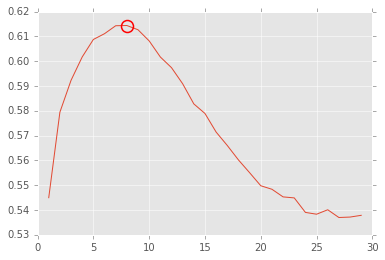

In [126]:
# Check out the scores of the grid search
grid_mean_scores = [result[1] for result in grid.grid_scores_]


# Plot the results of the grid search
plt.figure()
plt.plot(depth_range, grid_mean_scores)
plt.hold(True)
plt.grid(True)
plt.plot(grid.best_params_['max_depth'], grid.best_score_, 'ro', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')

In [128]:
ctree = tree.DecisionTreeClassifier(random_state=1, criterion='gini',max_depth=7)

ctree.fit(X_train, y_train)

# Fit the decision tree classifier
ctree.predict(X_test)
# Make predictions on the test set
preds = ctree.predict(X_test)

# Accuracy
print 'Accuracy (Descision tree) =', metrics.accuracy_score(y_test, preds)

# Calculate the AUC metric
print "ROC(Descision tree) = ",metrics.roc_auc_score(y_test, preds)

print(classification_report(y_test, preds, target_names=target_names))

Accuracy (Descision tree) = 0.624552572707
ROC(Descision tree) =  0.557688575265
                 precision    recall  f1-score   support

 Readmission_NO       0.63      0.89      0.74     10756
Readmission_YES       0.57      0.23      0.33      7124

    avg / total       0.61      0.62      0.58     17880



In [129]:
cross_val_score(best, X, y, cv=10, scoring='roc_auc').mean()

0.58026622521554327

In [131]:
cross_val_score(best, X, y, cv=10, scoring='accuracy').mean()

0.60994464942612325

In [114]:
# Fitting a standard logistic regression model
# C is a cutoff for coefficients. The higher it is, the less the amount of regularisation. 
# So we set it very high first which is equivalent to no regularisation
# def __logreg__(n):
from sklearn.linear_model import LogisticRegressionCV
from datetime import datetime
startTime = datetime.now()

# Set random seed for replication
seed = np.random.seed(12345)
n=5
AUC1 = []
AUC2 = []
for i , C in enumerate((1e10,1e2,1)):
    c = int(C)
    # Turn down tolerance iteratively. Lower tolerance means increased chance of zero coefficients
    # L1 and L2 setup
    logreg1 = LogisticRegressionCV(Cs=[C],cv=n,penalty='l1',solver='liblinear',scoring='roc_auc',random_state=seed) 
    logreg2 = LogisticRegressionCV(Cs=[c],cv=n,penalty='l2',scoring='roc_auc',random_state=seed)
    # fit the models
    logreg1.fit(X_train, y_train)
    logreg2.fit(X_train, y_train)
    # Calculate the mean roc_auc score
    score1 = logreg1.scores_
    score2 = logreg2.scores_
    
    meanval1 = sum(score1.values()[0])/float(len(score1.values()[0]))
    meanval2 = sum(score2.values()[0])/float(len(score2.values()[0]))
    
    print "C=%.2f" % C
    print " "
    print "Mean AUC Score with L1 penalty: %.4f" % meanval1[0]
    print " "
    print "Mean AUC Score with L2 penalty: %.4f" % meanval2[0]
        
    AUC1.append(meanval1[0])
    AUC2.append(meanval2[0])
    


print "The average AUC score for for L1 Penalty is" , np.mean(AUC1)
print "The average AUC score for for L2 Penalty is" , np.mean(AUC2)
print " " 
print AUC1
print " "
print AUC2
print " "
print datetime.now() - startTime

C=10000000000.00
 
Mean AUC Score with L1 penalty: 0.6334
 
Mean AUC Score with L2 penalty: 0.6320
C=100.00
 
Mean AUC Score with L1 penalty: 0.6334
 
Mean AUC Score with L2 penalty: 0.6316
C=1.00
 
Mean AUC Score with L1 penalty: 0.6336
 
Mean AUC Score with L2 penalty: 0.6319
The average AUC score for for L1 Penalty is 0.633495298537
The average AUC score for for L2 Penalty is 0.631839988917
 
[0.63343914807995316, 0.63344352977447405, 0.63360321775547157]
 
[0.63199396842037481, 0.63163836356396175, 0.63188763476695475]
 
0:03:08.141000


In [141]:
# import class, instantiate estimator, fit with all data
from sklearn.ensemble import RandomForestClassifier
#rfclf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)
rfclf = RandomForestClassifier(n_estimators=100,oob_score=True)
rfclf.fit(X_train, y_train)
y_pred_rf = rfclf.predict(X_test)
# compute the feature importances
#pd.DataFrame({'feature':feature_cols, 'importance':rfclf.feature_importances_})

# compute the out-of-bag classification accuracy
#rfclf.oob_score_

In [142]:
print 'Accuracy (Random Forest) =', metrics.accuracy_score(y_test, y_pred_rf)


Accuracy (Random Forest) = 0.618903803132


In [133]:
rfclf.score(X_train, y_train)

0.99994406950296433

In [146]:
#have a look at which features were most important
importances = rfclf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfclf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

#for f in range(X.shape[1]):
 #   print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
output = pd.DataFrame(zip(feature_cols, rfclf.feature_importances_)).sort_index(by=1, ascending=False)

output.to_csv('OUTPUT/feature_rank.csv')

Feature ranking:


E:\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
